# Laboratorio 7

* Asuma que las operaciones no requieren alta precisión.
* Presente su solución con el nombre `lab7_codigoPUCP.ipynb`

In [1]:
import numpy
ns = 2**numpy.arange(5,15)
print(ns)

[   32    64   128   256   512  1024  2048  4096  8192 16384]


a) Implementar (en un único archivo) cuatro funciones en C que acumule el producto interno de dos arreglos números reales. Solo puede emplear un único bucle `for`. En la primera función realizar la acumulación elemento a elemento, en la segunda acumule en bloques de 2 elementos, en la tercera acumule en bloques de 4 elementos, y en la cuarta acumule en bloques de 8 elementos. (2.0 ptos)

In [2]:
%%file parte_a.c

#include <stdio.h>
#include <stdint.h>

void funcionde1(double *A, double *B, int n, double *result) {
    double suma = 0.0;
    for (int i = 0; i < n; i++) {
        suma += A[i] * B[i];
    }
    *result = suma;
}

void funcionde2(double *A, double *B, int n, double *result) {
    double suma = 0.0;
    for (int i = 0; i < n; i += 2) {
        suma += (A[i] * B[i]) + (A[i + 1] * B[i + 1]);
    }
    *result = suma;

}

void funcionde4(double *A, double *B, int n, double *result) {
    double suma = 0.0;
    for (int i = 0; i < n; i += 4) {
        suma += (A[i] * B[i]) + (A[i + 1] * B[i + 1]) + (A[i + 2] * B[i + 2]) + (A[i + 3] * B[i + 3]);
    }
    *result = suma;
}

void funcionde8(double *A, double *B, int n, double *result) {
    double suma = 0.0;
    for (int i = 0; i < n; i += 8) {
        suma += (A[i] * B[i]) + (A[i + 1] * B[i + 1]) + (A[i + 2] * B[i + 2]) + (A[i + 3] * B[i + 3]) +
                (A[i + 4] * B[i + 4]) + (A[i + 5] * B[i + 5]) + (A[i + 6] * B[i + 6]) + (A[i + 7] * B[i + 7]);
    }
    *result = suma;
}




Writing parte_a.c


b) Coloque el comando para generar la librería dinámica del ítem (a) y genere la librería dinámica. (0.25 ptos)

In [3]:
! gcc -c parte_a.c -o parte_a.o

In [4]:
! gcc -shared parte_a.o -o parte_a.so

c) Implemente una función que vincule la librería dinámica generada en el ítem (b) con Python usando `ctypes`. La función no recibe argumentos y debe devolver las cuatro funciones configuradas listas para su uso. (0.5 ptos)

In [5]:
import ctypes


lib = ctypes.CDLL('./parte_a.so')

lib.funcionde1.argtypes = [ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.POINTER(ctypes.c_double)]
lib.funcionde1.restype = None

lib.funcionde2.argtypes = [ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.POINTER(ctypes.c_double)]
lib.funcionde2.restype = None

lib.funcionde4.argtypes = [ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.POINTER(ctypes.c_double)]
lib.funcionde4.restype = None

lib.funcionde8.argtypes = [ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.POINTER(ctypes.c_double)]
lib.funcionde8.restype = None



def obtener_funciones():
    return (
        lib.funcionde1,
        lib.funcionde2,
        lib.funcionde4,
        lib.funcionde8,
    )


d) Haga una instancia de las cuatro funciones a partir de su función en el ítem (c) (0.25 ptos)

In [6]:
funcionde1 ,funcionde2, funcionde4 , funcionde8 = obtener_funciones()

e) Pruebe todas sus funciones obtenidas en el ítem (d) para el menor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. Completar la información para generar dos arreglos.(1.25 ptos)

In [7]:
import numpy as np
n = min(ns)
a = np.random.rand(n, n)
b = np.random.rand(n, n)
Y = a.flatten()
X = b.flatten()

result1 = ctypes.c_double()
funcionde1(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result1))
print(f"Rpta funcion de 1: {result1.value}")

result2 = ctypes.c_double()
funcionde2(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result2))
print(f"Rpta funcion de 2: {result2.value}")

result4 = ctypes.c_double()
funcionde4(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result4))
print(f"Rpta funcion de 4: {result4.value}")

result8 = ctypes.c_double()
funcionde8(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result8))
print(f"Rpta funcion de 8: {result8.value}")


Rpta funcion de 1: 245.12851939367224
Rpta funcion de 2: 245.12851939367252
Rpta funcion de 4: 245.12851939367252
Rpta funcion de 8: 245.12851939367243


f) Pruebe todas sus funciones obtenidas en el ítem (d) para el mayor de los valores de `ns` y la variable `Y`, y muestre que dan el mismo resultado. Completar nuevamente los arreglos a y b (1.25 ptos)

In [8]:
n = max(ns)
a = np.random.rand(n, n)
b = np.random.rand(n, n)
Y = a.flatten()
X = b.flatten()


result1 = ctypes.c_double()
funcionde1(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result1))
print(f"Rpta funcion de 1: {result1.value}")

result2 = ctypes.c_double()
funcionde2(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result2))
print(f"Rpta funcion de 2: {result2.value}")

result4 = ctypes.c_double()
funcionde4(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result4))
print(f"Rpta funcion de 4: {result4.value}")

result8 = ctypes.c_double()
funcionde8(X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), len(X), ctypes.byref(result8))
print(f"Rpta funcion de 8: {result8.value}")

Rpta funcion de 1: 67107305.55538866
Rpta funcion de 2: 67107305.55537474
Rpta funcion de 4: 67107305.55540129
Rpta funcion de 8: 67107305.55541519


g) Realice 50 mediciones de tiempo para todas sus funciones, y para todos los valores de `ns`. El valor representativo de las 50 mediciones será la mediana. (0.5 ptos)

In [35]:
import time

def calcular_tiempo(funcion, Y, X, n):
    times = []
    for _ in range(50):
        start_time = time.time()
        result = ctypes.c_double()
        funcion(Y.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), X.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), n, ctypes.byref(result))
        end_time = time.time()
        elapsed_time = end_time - start_time
        times.append(elapsed_time)
    return np.median(times)  # Devuelve la mediana de los tiempos

times1 = []
times2 = []
times4 = []
times8 = []

for n in ns:
    a = np.random.rand(n, n)
    Y = a.flatten()
    b = np.random.rand(n, n)
    X = b.flatten()

    time_ejecucion1 = calcular_tiempo(funcionde1, Y, X, n)
    time_ejecucion2 = calcular_tiempo(funcionde2, Y, X, n)
    time_ejecucion4 = calcular_tiempo(funcionde4, Y, X, n)
    time_ejecucion8 = calcular_tiempo(funcionde8, Y, X, n)

    times1.append(time_ejecucion1)
    times2.append(time_ejecucion2)
    times4.append(time_ejecucion4)
    times8.append(time_ejecucion8)


h) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. (0.25 ptos)

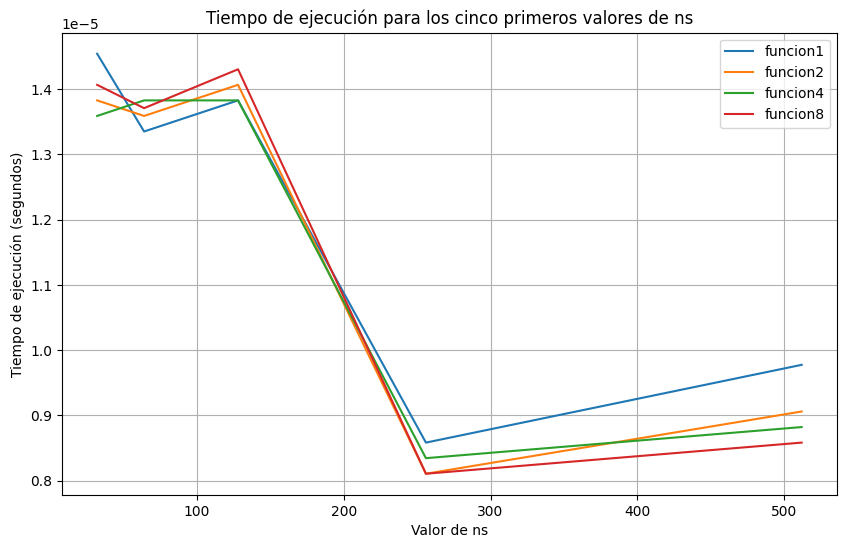

In [36]:
import matplotlib.pyplot as plt

ns_values = ns[:5]

plt.figure(figsize=(10, 6))
plt.plot(ns_values, times1[:5], label="funcion de 1")
plt.plot(ns_values, times2[:5], label="funcion de 2")
plt.plot(ns_values, times4[:5], label="funcion de 4")
plt.plot(ns_values, times8[:5], label="funcion de 8")
plt.xlabel('Valor de ns')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución para los cinco primeros valores de ns')
plt.legend()
plt.grid(True)
plt.show()




i) Presente una gráfica en la que muestre como varía el tiempo de ejecución respecto del valor de `ns`. Solo para los cinco últimos valores de `ns`. (0.25 ptos)

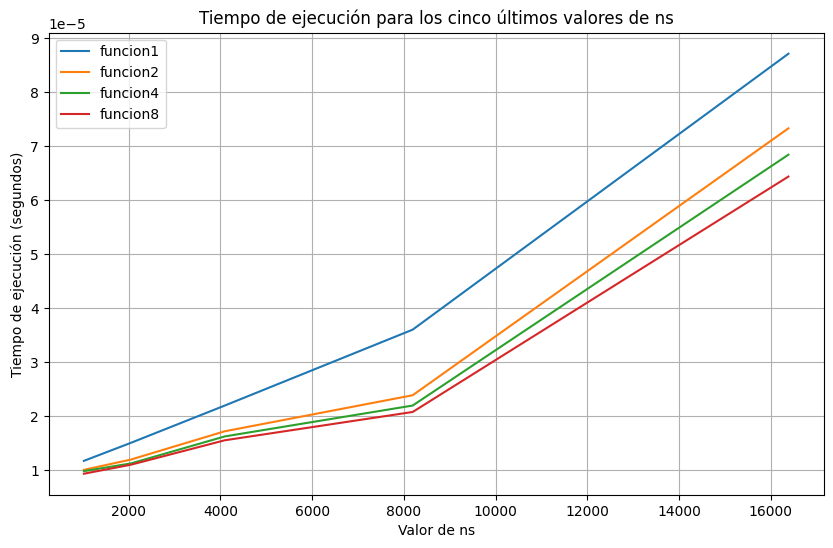

In [41]:
import matplotlib.pyplot as plt

ns_values = ns[-5:]

plt.figure(figsize=(10, 6))
plt.plot(ns_values, times1[-5:], label="funcion de 1")
plt.plot(ns_values, times2[-5:], label="funcion de 2")
plt.plot(ns_values, times4[-5:], label="funcion de 4")
plt.plot(ns_values, times8[-5:], label="funcion de 8")
plt.xlabel('Valor de ns')
plt.ylabel('Tiempo de ejecución (segundos)')
plt.title('Tiempo de ejecución para los cinco últimos valores de ns')
plt.legend()
plt.grid(True)
plt.show()


j) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

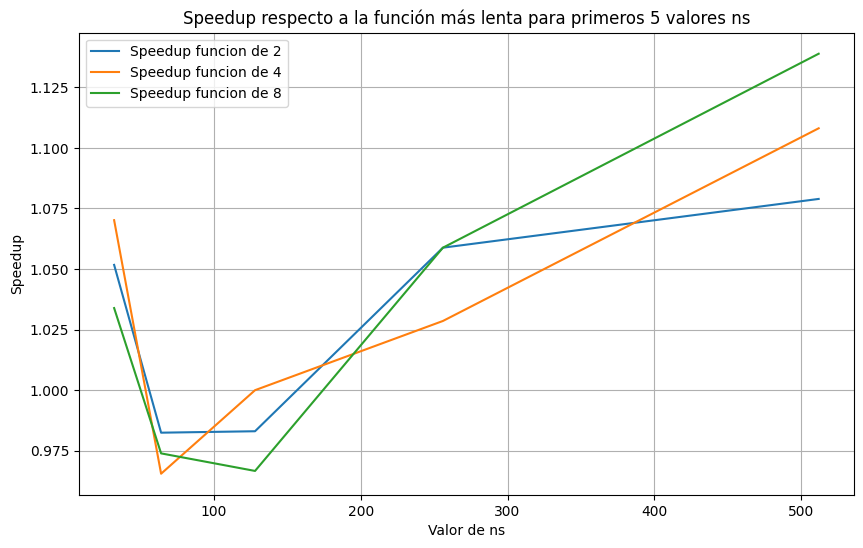

In [58]:

import matplotlib.pyplot as plt

speedup2 = [times1[i] / times2[i] for i in range(5)]
speedup4 = [times1[i] / times4[i] for i in range(5)]
speedup8 = [times1[i] / times8[i] for i in range(5)]

ns_values = ns[:5]

plt.figure(figsize=(10, 6))
plt.plot(ns_values, speedup2, label="Speedup funcion de 2")
plt.plot(ns_values, speedup4, label="Speedup funcion de 4")
plt.plot(ns_values, speedup8, label="Speedup funcion de 8")
plt.xlabel('Valor de ns')
plt.ylabel('Speedup')
plt.title('Speedup respecto a la función más lenta para primeros 5 valores ns')
plt.legend()
plt.grid(True)
plt.show()



k) Presente una gráfica en la que muestre como varía el *speedup* respecto del valor de `ns`. Solo para los cinco primeros valores de `ns`. Considere como referencia a la función más lenta. (0.25 ptos)

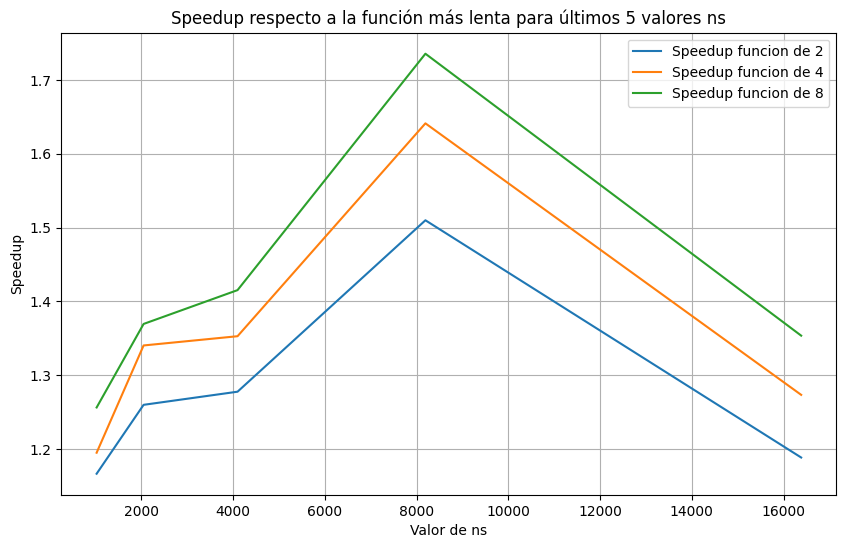

In [57]:
import matplotlib.pyplot as plt
speedup2 = [times1[i] / times2[i] for i in range(5,10)]
speedup4 = [times1[i] / times4[i] for i in range(5,10)]
speedup8 = [times1[i] / times8[i] for i in range(5,10)]

ns_values = ns[-5:]

plt.figure(figsize=(10, 6))
plt.plot(ns_values, speedup2, label="Speedup funcion de 2")
plt.plot(ns_values, speedup4, label="Speedup funcion de 4")
plt.plot(ns_values, speedup8, label="Speedup funcion de 8")
plt.xlabel('Valor de ns')
plt.ylabel('Speedup')
plt.title('Speedup respecto a la función más lenta para últimos 5 valores ns')
plt.legend()
plt.grid(True)
plt.show()

l) Extraer las características de la memoria caché de su computador (0.5)

labtel@06V307:~$ getconf -a | grep CACHE
LEVEL1_ICACHE_SIZE                 32768
LEVEL1_ICACHE_ASSOC                
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 32768
LEVEL1_DCACHE_ASSOC                8
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  262144
LEVEL2_CACHE_ASSOC                 4
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  16777216
LEVEL3_CACHE_ASSOC                 16
LEVEL3_CACHE_LINESIZE              64
LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 
LEVEL4_CACHE_LINESIZE  

Nivel 1 de caché de instrucciones (L1_ICACHE):
Tamaño: 32,768 bytes
Asociatividad: 2
Tamaño de línea: 64 bytes

Nivel 1 de caché de datos (L1_DCACHE):
Tamaño: 32,768 bytes
Asociatividad: 8
Tamaño de línea: 64 bytes

Nivel 2 de caché (L2_CACHE):
Tamaño: 262,144 bytes
Asociatividad: 4
Tamaño de línea: 64 bytes

Nivel 3 de caché (L3_CACHE):
Tamaño: 16,777,216 bytes (16 MB)
Asociatividad: 16
Tamaño de línea: 64 bytes

Nivel 4 de caché (L4_CACHE):
Tamaño: 0 (No se especifica tamaño)
Asociatividad: No se especifica asociatividad
Tamaño de línea: No se especifica tamaño de línea

m) Explique sus resultados de las implementaciones empleando conceptos de memoria caché. (3.5 ptos)

La primera función realiza una acumulación de los elementos del arreglo, de forma que accedie a un elemento de cada arreglo en cada iteración. De hecho, reduce la localidad temporal porque los datos no se reutilizan de manera eficiente y la caché L1 se llena y vacía constantemente, lo que lleva más tiempo que otras cachés. Sin embargo, la localidad espacial es buena ya que se accede secuencialmente a los elementos adyacentes de la matriz.

La segunda función recopila datos en bloques de dos elementos lo mejora la localidad temporal porque cada acceso a la memoria principal se utiliza para cargar 2 elementos, lo que reduce la frecuencia de los accesos a la memoria y el tiempo en comparación de la primera función. Así mismo localidad espacial sigue en correctas condiciones ya que se accede a los elementos adyacentes en 2 bloques.

La tercera función recopila datos en bloques de cuatro elementos cada uno de forma mejora aún más la localidad temporal ya que la memoria lee un bloque de datos más grande que las primeras funciones.En otros términos, exisitirá un menos por lo menos acceso a la memoria principal y una caché más eficiente. La localidad espacial procura su efectividad ya que se cumple con la tendencia de acceder a los elementos adyacentes en bloques más grandes en la memoria.

La cuarta función supera al resto porque lo distribuye en bloques de 8 elementos cada uno, lo cual reduce la cantidad de accesos a la memoria principal y garantiza una localidad temporal óptima para todas las funciones.Cabe resaltar que minimiza cuellos de botella con la caché y acelera el procesamiento de datos de la matriz. En la localidad espacial, se conservan elementos conectados dentro de bloques más grandes.

La implementación de la aceleración es la base para determinar el rendimiento y la eficiencia del tiempo de ejecución en comparación con la característica inicial como una matriz de datos que afectar la memoria caché de la computadora. Es decir que refleja en la aceleración de funciones lentas y permite una mejor explotación de la localidad temporal al reducir los accesos a la memoria principal y mejorar la gestión de la caché en el procesamiento de datos.Aún se podría mejorar el código
